# "Airbnb Pakistan Listing Analysis and Preprocessing"

#### The aim of this project is to analyze and preprocess Airbnb listing data for properties in Pakistan. The dataset contains information such as location, host details, pricing, and room types. The goal is to identify and handle errors, missing values, and inconsistencies in the dataset, as well as perform exploratory data analysis to gain insights into the Airbnb market in Pakistan. By addressing these data quality issues and extracting meaningful information, the project aims to provide a clean and reliable dataset for further analysis and decision-making in the domain of Airbnb rentals in Pakistan.

### Milestone 1: Data Pre-processing 

#### --- Importing libraries --- 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# pip install openpyxl

#### The dataset is taken from keggle: "https://www.kaggle.com/datasets/ibtisamkhalid/airbnb-listings-pakistan" for preprocessing assignment

#### --- Coverting .xlsx to CSV --- 

In [3]:
df = pd.read_excel("Combined .xlsx")
df.to_csv('Combined.csv')

In [4]:
df = pd.read_csv("Combined.csv")

#### --- Understanding Dataset --- 

In [5]:
df.head()

,Unnamed: 0,address,isHostedBySuperhost,location/lat,location/lng,name,numberOfGuests,pricing/rate/amount,pricing/rate/amountFormatted,pricing/rate/currency,...,primaryHost/memberSince,primaryHost/pictureUrl,primaryHost/responseRate,primaryHost/responseTime,primaryHost/smartName,primaryHost/thumbnailUrl,roomType,stars,url,primaryHost/about
0,0,"Karachi, Sindh, Pakistan",No,24.84400,67.03800,2020,16.0,23.0,$23,USD,...,Joined in September 2020,https://a0.muscache.com/im/pictures/user/836fc...,0.22,a few days or more,Chaudhry,https://a0.muscache.com/im/pictures/user/836fc...,Private room,NaN,https://www.airbnb.com/rooms/46383328,self made
1,1,"Islamabad, Islamabad Capital Territory, Pakistan",No,33.51961,73.09235,"""2F3"" Hotel Vista Inn DHA 1 F ""5 Star look""",2.0,25.0,$25,USD,...,Joined in October 2019,https://a0.muscache.com/im/pictures/user/c20bb...,NaN,NaN,Muhammad Yaseen,https://a0.muscache.com/im/pictures/user/c20bb...,Private room,NaN,https://www.airbnb.com/rooms/43456998,I am a hospitable person and I always try to f...
2,2,"Islamabad, Islamabad Capital Territory, Pakistan",No,33.70037,73.00893,"""La Casa de Versace"" Versace themed apt in F10.",4.0,63.0,$63,USD,...,Joined in February 2021,https://a0.muscache.com/im/pictures/user/d9559...,0.92,within an hour,Arif,https://a0.muscache.com/im/pictures/user/d9559...,Entire place,4.63,https://www.airbnb.com/rooms/48253119,NaN
3,3,"Islamabad, Islamabad Capital Territory, Pakistan",No,33.51987,73.09032,"""LG1"" Hotel Vista Inn DHA 1 F ""5 Star look""",2.0,25.0,$25,USD,...,Joined in October 2019,https://a0.muscache.com/im/pictures/user/c20bb...,NaN,NaN,Muhammad Yaseen,https://a0.muscache.com/im/pictures/user/c20bb...,Private room,NaN,https://www.airbnb.com/rooms/43439434,I am a hospitable person and I always try to f...
4,4,"Lahore, Punjab, Pakistan",No,31.42933,74.25051,"""Studio Private Room in Peaceful location.""",2.0,21.0,$21,USD,...,Joined in August 2019,https://a0.muscache.com/im/pictures/user/53c56...,NaN,NaN,Muhammad,https://a0.muscache.com/im/pictures/user/53c56...,Private room,NaN,https://www.airbnb.com/rooms/52463548,"I Speak English, Spanish, Punjabi and Hindi"


In [6]:
df.shape

(1117, 31)

In [7]:
df.describe()

,Unnamed: 0,location/lat,location/lng,numberOfGuests,pricing/rate/amount,primaryHost/hasProfilePic,primaryHost/id,primaryHost/responseRate,stars
count,1117.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.0,1.116000e+03,786.000000,334.000000
mean,558.000000,30.629105,72.122044,4.059140,41.331541,1.0,2.882227e+08,0.664033,4.669850
std,322.594431,3.392454,2.896703,3.290712,18.446464,0.0,1.116740e+08,0.429212,0.386844
min,0.000000,24.772810,66.980420,1.000000,10.000000,1.0,1.838483e+06,0.000000,2.330000
25%,279.000000,31.355480,72.923695,2.000000,25.000000,1.0,2.080901e+08,0.000000,4.570000
50%,558.000000,31.483855,73.105080,3.000000,40.000000,1.0,3.074997e+08,0.970000,4.775000
75%,837.000000,33.575043,74.275265,4.000000,55.000000,1.0,3.804083e+08,1.000000,4.920000
max,1116.000000,33.826280,74.492030,16.000000,97.000000,1.0,4.870239e+08,1.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    1117 non-null   int64  
 1   address                       1116 non-null   object 
 2   isHostedBySuperhost           1116 non-null   object 
 3   location/lat                  1116 non-null   float64
 4   location/lng                  1116 non-null   float64
 5   name                          1116 non-null   object 
 6   numberOfGuests                1116 non-null   float64
 7   pricing/rate/amount           1116 non-null   float64
 8   pricing/rate/amountFormatted  1116 non-null   object 
 9   pricing/rate/currency         1116 non-null   object 
 10  pricing/rateType              1116 non-null   object 
 11  primaryHost/badges/0          866 non-null    object 
 12  primaryHost/badges/1          530 non-null    object 
 13  pri

In [9]:
df.isnull().sum()

Unnamed: 0                         0
address                            1
isHostedBySuperhost                1
location/lat                       1
location/lng                       1
name                               1
numberOfGuests                     1
pricing/rate/amount                1
pricing/rate/amountFormatted       1
pricing/rate/currency              1
pricing/rateType                   1
primaryHost/badges/0             251
primaryHost/badges/1             587
primaryHost/firstName              1
primaryHost/hasProfilePic          1
primaryHost/hostUrl                1
primaryHost/id                     1
primaryHost/languages/0          679
primaryHost/languages/1          792
primaryHost/languages/2          904
primaryHost/languages/3         1054
primaryHost/memberSince            1
primaryHost/pictureUrl             1
primaryHost/responseRate         331
primaryHost/responseTime         331
primaryHost/smartName              1
primaryHost/thumbnailUrl           1
r

In [10]:
df.duplicated().sum()

0

#### --- Removing useless features from the dataset --- 

In [11]:
df.drop(columns=['Unnamed: 0', 'primaryHost/languages/0', 'primaryHost/languages/1', 'primaryHost/languages/2', 'primaryHost/languages/3', 'primaryHost/about', 'stars', 'primaryHost/responseTime'], inplace=True)

In [12]:
df.drop(columns=['primaryHost/hasProfilePic', 'primaryHost/hostUrl', 'primaryHost/id', 'pricing/rate/currency', 'location/lat', 'location/lng', 'pricing/rate/amount', 'primaryHost/thumbnailUrl', 'pricing/rateType', 'primaryHost/pictureUrl'], inplace=True)

#### --- Handling the missing values --- 

In [13]:
df.dropna(subset=["address"], inplace=True)

In [14]:
df.isnull().sum()

address                           0
isHostedBySuperhost               0
name                              0
numberOfGuests                    0
pricing/rate/amountFormatted      0
primaryHost/badges/0            251
primaryHost/badges/1            586
primaryHost/firstName             0
primaryHost/memberSince           0
primaryHost/responseRate        330
primaryHost/smartName             0
roomType                          0
url                               0
dtype: int64

In [15]:
df.loc[df['primaryHost/badges/1'].isnull() & (df['primaryHost/badges/0'] == 'Identity verified'), 'primaryHost/badges/1'] = 'Identity verified'
df.loc[df['primaryHost/badges/0'] == 'Identity verified', 'primaryHost/badges/0'] = pd.NaT

In [16]:
replacement_string = '0 Reviews'  # Specify the string to replace NaN values
df["primaryHost/badges/0"] = df["primaryHost/badges/0"].fillna(replacement_string)

In [17]:
replacement_string = 'Identity not verified'  # Specify the string to replace NaN values
df["primaryHost/badges/1"] = df["primaryHost/badges/1"].fillna(replacement_string)

In [18]:
df['primaryHost/responseRate'] = df['primaryHost/responseRate'].fillna(0)

In [19]:
df.isnull().sum()

address                         0
isHostedBySuperhost             0
name                            0
numberOfGuests                  0
pricing/rate/amountFormatted    0
primaryHost/badges/0            0
primaryHost/badges/1            0
primaryHost/firstName           0
primaryHost/memberSince         0
primaryHost/responseRate        0
primaryHost/smartName           0
roomType                        0
url                             0
dtype: int64

#### --- Removing empty spaces from fatures --- 

In [20]:
print(df['roomType'].unique())

['Private room' 'Entire place' 'Private room ' 'Shared room '
 'Shared room']


In [21]:
df['roomType'] = df['roomType'].str.strip()  # Remove leading and trailing spaces

# Print the cleaned room types
print(df['roomType'].unique())

['Private room' 'Entire place' 'Shared room']


#### --- Cross verification of column: RoomType --- 

In [22]:
# Example: Cross-verification with external source
expected_values = ['Private room', 'Entire place', 'Shared room']
is_valid_values = df['roomType'].isin(expected_values)
print("Are the values valid?", is_valid_values.all())

Are the values valid? True


In [23]:
df.isnull().sum()

address                         0
isHostedBySuperhost             0
name                            0
numberOfGuests                  0
pricing/rate/amountFormatted    0
primaryHost/badges/0            0
primaryHost/badges/1            0
primaryHost/firstName           0
primaryHost/memberSince         0
primaryHost/responseRate        0
primaryHost/smartName           0
roomType                        0
url                             0
dtype: int64

#### --- Analyzing unique values of each feature --- 

In [24]:
df["isHostedBySuperhost"].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
# Example: Removing leading/trailing whitespaces in a column
df['address'] = df['address'].str.strip()

In [26]:
df['address'].unique()

array(['Karachi, Sindh, Pakistan',
       'Islamabad, Islamabad Capital Territory, Pakistan',
       'Lahore, Punjab, Pakistan', 'Rawalpindi, Punjab, Pakistan'],
      dtype=object)

In [27]:
df['numberOfGuests'].unique()

array([16.,  2.,  4.,  5.,  3.,  6.,  1.,  8., 13., 10.,  7., 15., 11.,
       12.,  9., 14.])

In [28]:
df['pricing/rate/amountFormatted'].unique()

array(['$23', '$25', '$63', '$21', '$34', '$18', '$39', '$54', '$46',
       '$17', '$24', '$16', '$37', '$57', '$51', '$26', '$49', '$29',
       '$56', '$19', '$40', '$11', '$30', '$22', '$35', '$75', '$74',
       '$68', '$31', '$67', '$76', '$92', '$32', '$48', '$42', '$84',
       '$91', '$43', '$72', '$33', '$60', '$79', '$14', '$28', '$47',
       '$59', '$66', '$55', '$38', '$15', '$80', '$13', '$45', '$64',
       '$58', '$83', '$94', '$36', '$50', '$65', '$52', '$82', '$27',
       '$71', '$41', '$62', '$78', '$53', '$88', '$44', '$10', '$86',
       '$90', '$70', '$20', '$97', '$87', '$73', '$96'], dtype=object)

In [29]:
df['primaryHost/badges/0'].unique()

array(['0 Reviews', '1 Review', '38 Reviews', '15 Reviews', '273 Reviews',
       '114 Reviews', '9 Reviews', '216 Reviews', '171 Reviews',
       '2 Reviews', '37 Reviews', '3 Reviews', '61 Reviews', '4 Reviews',
       '28 Reviews', '7 Reviews', '36 Reviews', '70 Reviews',
       '41 Reviews', '357 Reviews', '50 Reviews', '8 Reviews',
       '46 Reviews', '30 Reviews', '112 Reviews', '633 Reviews',
       '90 Reviews', '162 Reviews', '16 Reviews', '208 Reviews',
       '62 Reviews', '21 Reviews', '79 Reviews', '59 Reviews',
       '186 Reviews', '105 Reviews', '11 Reviews', '119 Reviews',
       '66 Reviews', '140 Reviews', '22 Reviews', '5 Reviews',
       '150 Reviews', '281 Reviews', '329 Reviews', '91 Reviews',
       '17 Reviews', '67 Reviews', '418 Reviews', '83 Reviews',
       '71 Reviews', '74 Reviews', '121 Reviews', '77 Reviews',
       '51 Reviews', '14 Reviews', '85 Reviews', '187 Reviews',
       '169 Reviews', '57 Reviews', '709 Reviews', '29 Reviews',
       '55 Revie

In [30]:
df['primaryHost/badges/1'].unique()

array(['Identity verified', 'Identity not verified'], dtype=object)

In [31]:
# Example: Correcting inconsistent capitalization in a column
df['primaryHost/firstName'] = df['primaryHost/firstName'].str.capitalize()

In [32]:
df['primaryHost/firstName'].unique()

array(['Chaudhry', 'Muhammad yaseen', 'Arif', 'Muhammad', 'Ahmed',
       'Hilal', 'Sharjeel', 'Kay', 'Zaheer', 'Imran', 'Sami', 'Usman',
       'Saqib', 'Alee', 'Momin', 'Umar', 'Subtain', 'Owais ahmad',
       'Maisam', 'Bilal', 'Sherz', 'Timna', 'Babar', 'Rehan', 'Nofil',
       'Amir', 'Rbea', 'Sajawal', 'Kamran', 'Asif', 'Abid', 'Iqra',
       'Razia', 'Haider ali', 'Afzal', 'Rauf', 'Omer', 'Hazim', 'Mateen',
       'Syed sajjad', 'Bakir', 'Fabiha', 'Azfand', '12th avenue',
       'Farrukh', 'Hussain', 'Waleed', 'Raja', 'Waqas', 'Junaid',
       'Mukarram', 'Absar', 'Asher', 'Mohammad', 'Sadya',
       'Capital suites', 'Bibi', 'Samama', 'Khuzaima', 'Ammad hassan',
       'Arslan', 'Maaz', 'Muzana', 'Ayesha', 'Tahmas', 'Sanwal', 'Azeem',
       'Shabbir', 'Shams', 'Mahnoor', 'Jawaid', 'Abdul', 'Hamza', 'Ehsan',
       'Adeeba', 'Muhammad feroz', 'Syed muhammad shabi', 'Shahid',
       'Aamir', 'Waqar', 'Farwa', 'Mati', 'Ismail', 'Hassan', 'Mustafa',
       'Roohi', 'Parveen', 'Noe

In [33]:
df['primaryHost/memberSince'].unique()

array(['Joined in September 2020', 'Joined in October 2019',
       'Joined in February 2021', 'Joined in August 2019',
       'Joined in September 2017', 'Joined in June 2018',
       'Joined in May 2017', 'Joined in February 2020',
       'Joined in July 2018', 'Joined in November 2021',
       'Joined in November 2019', 'Joined in December 2019',
       'Joined in August 2015', 'Joined in September 2021',
       'Joined in March 2020', 'Joined in April 2019',
       'Joined in December 2020', 'Joined in February 2019',
       'Joined in April 2021', 'Joined in January 2021',
       'Joined in September 2019', 'Joined in June 2016',
       'Joined in August 2017', 'Joined in March 2018',
       'Joined in March 2021', 'Joined in January 2022',
       'Joined in January 2020', 'Joined in September 2018',
       'Joined in May 2019', 'Joined in December 2021',
       'Joined in January 2019', 'Joined in January 2016',
       'Joined in May 2018', 'Joined in October 2018',
       'Joine

In [34]:
df['primaryHost/responseRate'].unique()

array([0.22, 0.  , 0.92, 1.  , 0.9 , 0.75, 0.33, 0.6 , 0.81, 0.97, 0.89,
       0.5 , 0.91, 0.96, 0.17, 0.7 , 0.13, 0.57, 0.43, 0.63, 0.98, 0.14,
       0.25, 0.67, 0.99, 0.93, 0.8 , 0.2 , 0.76, 0.86, 0.94, 0.95, 0.84,
       0.74, 0.88, 0.4 , 0.71, 0.56, 0.44, 0.73, 0.78])

In [35]:
df['primaryHost/smartName'].unique()

array(['Chaudhry', 'Muhammad Yaseen', 'Arif', 'Muhammad', 'Ahmed',
       'Hilal', 'Sharjeel', 'Kay', 'Zaheer', 'Imran', 'Sami', 'Usman',
       'Saqib', 'Alee', 'Momin', 'Umar', 'Subtain', 'Owais Ahmad',
       'Maisam', 'Bilal', 'Sherz', 'Timna', 'Babar', 'Rehan', 'Nofil',
       'Amir', 'Rbea', 'Sajawal', 'Kamran', 'Asif', 'Abid', 'Iqra',
       'Razia', 'Haider Ali', 'Afzal', 'Rauf', 'Omer', 'Hazim', 'Mateen',
       'Syed Sajjad', 'Bakir', 'Fabiha', 'Azfand', '12th Avenue',
       'Farrukh', 'Hussain', 'Waleed', 'Raja', 'Waqas', 'Junaid',
       'Mukarram', 'Absar', 'Asher', 'Mohammad', 'Sadya',
       'Capital Suites', 'Bibi', 'Samama', 'Khuzaima', 'Ammad Hassan',
       'Arslan', 'Maaz', 'Muzana', 'Ayesha', 'Tahmas', 'Sanwal', 'Azeem',
       'Shabbir', 'Shams', 'Mahnoor', 'Jawaid', 'Abdul', 'Hamza', 'Ehsan',
       'Adeeba', 'Muhammad Feroz', 'Syed Muhammad Shabi', 'Shahid',
       'Aamir', 'Waqar', 'Farwa', 'Mati', 'Ismail', 'Hassan', 'Mustafa',
       'Roohi', 'Parveen', 'Noe

In [36]:
df['url'].unique()

array(['https://www.airbnb.com/rooms/46383328',
       'https://www.airbnb.com/rooms/43456998',
       'https://www.airbnb.com/rooms/48253119', ...,
       'https://www.airbnb.com/rooms/25321848',
       'https://www.airbnb.com/rooms/52430738',
       'https://www.airbnb.com/rooms/35773390'], dtype=object)

#### --- Data Visualization --- 

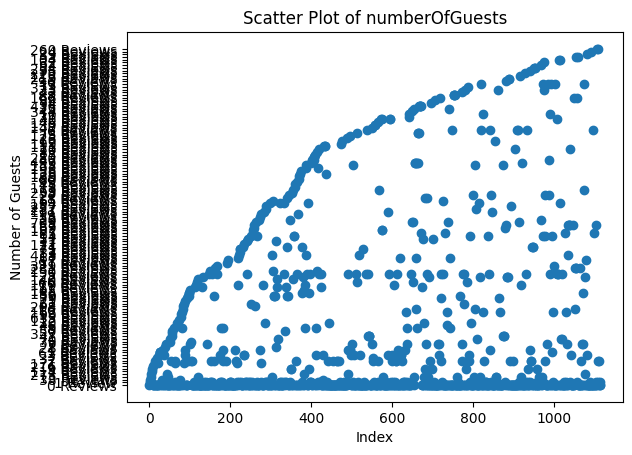

In [37]:
# Scatter plot of Number of Guests

plt.scatter(df.index, df['primaryHost/badges/0'])
plt.xlabel('Index')
plt.ylabel('Number of Guests')
plt.title('Scatter Plot of numberOfGuests')
plt.show()

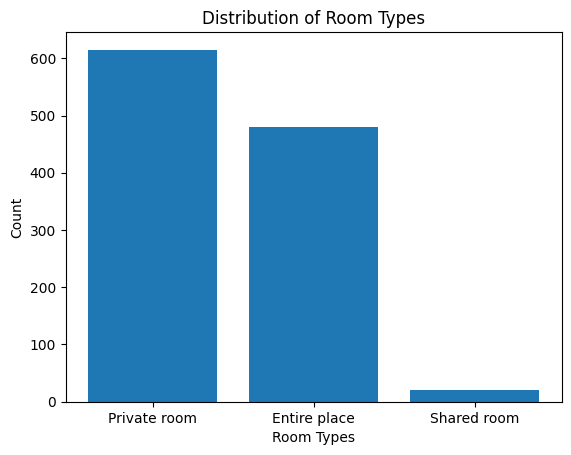

In [38]:
# Bar Plot of Room Types:

room_type_counts = df['roomType'].value_counts()
plt.bar(room_type_counts.index, room_type_counts.values)
plt.xlabel('Room Types')
plt.ylabel('Count')
plt.title('Distribution of Room Types')
plt.show()

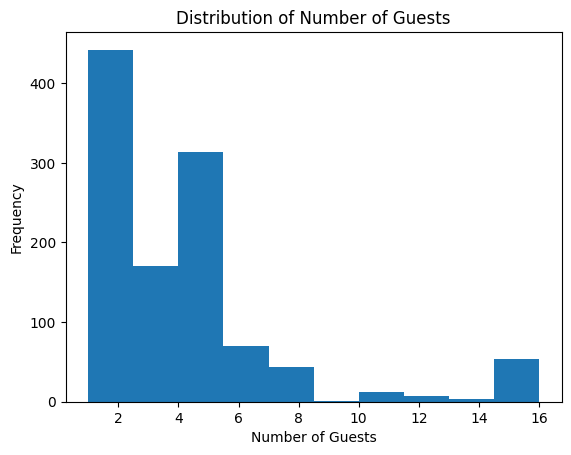

In [39]:
# Histogram of Number of Guests:

plt.hist(df['numberOfGuests'], bins=10)
plt.xlabel('Number of Guests')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Guests')
plt.show()

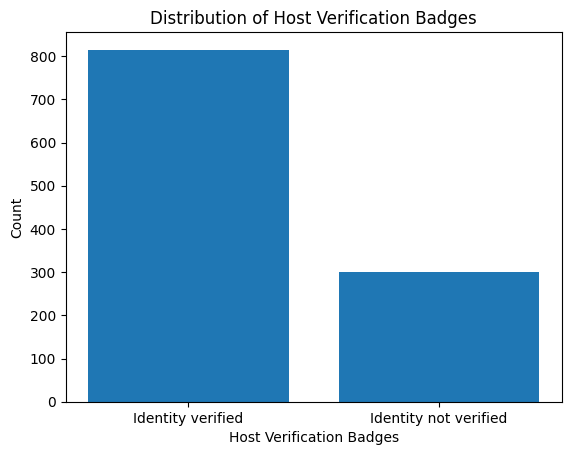

In [40]:
# Bar Plot of Host Verification Badges:

badge_counts = df['primaryHost/badges/1'].value_counts()
plt.bar(badge_counts.index, badge_counts.values)
plt.xlabel('Host Verification Badges')
plt.ylabel('Count')
plt.title('Distribution of Host Verification Badges')
plt.show()

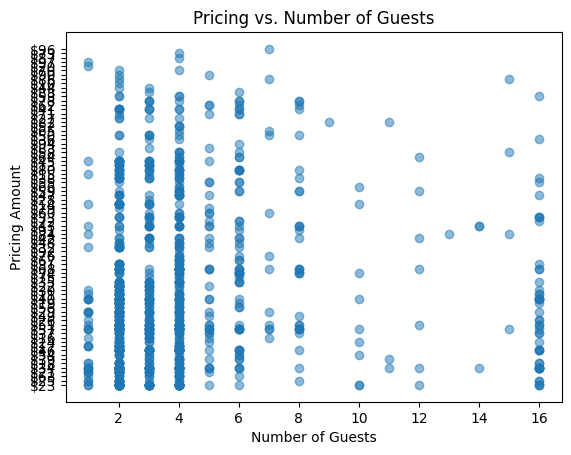

In [41]:
# Scatter Plot of Pricing vs. Number of Guests:

plt.scatter(df['numberOfGuests'], df['pricing/rate/amountFormatted'], alpha=0.5)
plt.xlabel('Number of Guests')
plt.ylabel('Pricing Amount')
plt.title('Pricing vs. Number of Guests')
plt.show()

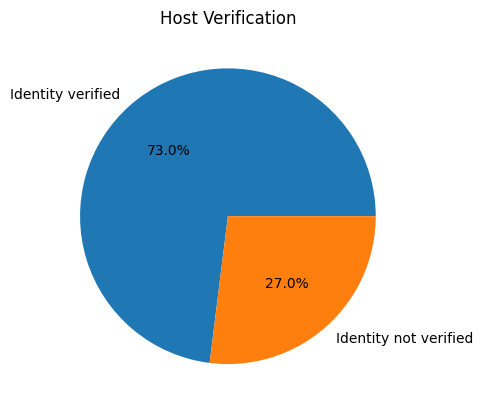

In [42]:
#Pie Chart of Host Verification:

verification_counts = df['primaryHost/badges/1'].value_counts()
plt.pie(verification_counts.values, labels=verification_counts.index, autopct='%1.1f%%')
plt.title('Host Verification')
plt.show()

In [43]:
df.to_csv('preprocessed.csv', index=False)

#### --- Data Profiling using pandas --- 

In [44]:
import pandas_profiling

# Generate report
profile = pandas_profiling.ProfileReport(df)

# Save report as HTML file
profile.to_file("DataProfiling.html")

C:\Users\Malak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Malak\AppData\Local\Temp\ipykernel_8876\1132978587.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 18.65it/s]


### --- Milestone 1 Achieved ---